<font size="+3"><b>Non-Linear Models and Validation Metrics</b></font>

<font color='Blue'>
In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.
</font>

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Part 1: Regression (14.5 marks)**

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

## **Step 1:** Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library:
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [ ]:
# Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete

# Load concrete dataset into the feature matrix X and target vector y
X, y = load_concrete()

## **Step 2:** Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

<font color='red'>
This is just for your information and no action is required from you for this step.
</font>

## **Step 3:** Implement Machine Learning Model (0.5 marks)

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

## **Step 4:** Validate Model (0.5 marks)

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

## **Step 5:** Visualize Results (3 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [ ]:
# ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the three models
models = {
    'DT': DecisionTreeRegressor(max_depth = 5, random_state = 0),
    'RF': RandomForestRegressor(max_depth = 5, random_state = 0),
    'GB': GradientBoostingRegressor(max_depth = 5, random_state = 0)
}

# Initialize results DataFrame
results = pd.DataFrame(columns=['Training Accuracy', 'Validation Accuracy'], index = models.keys())

# Used hint to put code in a loop
for name, model in models.items():
  # Calculate accuracies with cross-validation
  cv_results = cross_validate(model, X, y, scoring = 'neg_mean_squared_error', return_train_score = True)
  training_accuracy = -1 * cv_results['train_score'].mean()
  validation_accuracy = -1 * cv_results['test_score'].mean()
  # Add accuracy results to DataFrame
  results.loc[name, 'Training Accuracy'] = training_accuracy
  results.loc[name, 'Validation Accuracy'] = validation_accuracy

# Print results
print(results)

   Training Accuracy Validation Accuracy
DT         47.918561          163.087775
RF         32.055432          156.404972
GB           3.73927           99.360259


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`.

<font color='red'>
Due to the similarity of this to the main part of step 5, this part is 0.5 and the main part of step 5 is 2.5 of the total 3 points for this step.
</font>

In [ ]:
# This would be similar to the main step, the main difference is the scoring.

# Initialize results DataFrame
results2 = pd.DataFrame(columns=['Training Accuracy', 'Validation Accuracy'], index = models.keys())

# Used hint to put code in a loop
for name, model in models.items():
  # Calculate accuracies with cross-validation
  cv_results = cross_validate(model, X, y, scoring = 'r2', return_train_score = True)
  training_accuracy = cv_results['train_score'].mean()
  validation_accuracy = cv_results['test_score'].mean()
  # Add accuracy results to DataFrame
  results2.loc[name, 'Training Accuracy'] = training_accuracy
  results2.loc[name, 'Validation Accuracy'] = validation_accuracy

# Print results
print(results2)

   Training Accuracy Validation Accuracy
DT          0.822887             0.17621
RF          0.881221            0.173748
GB          0.986436            0.473701


## Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

<font color='Green'><b>
1. The linear model in the previous assignment gave high MSE in both the training and validation accuracies (110 and 96 respectively), where its training MSE was much higher than all the non-linear models used above (about 48, 32, and 4 respectively for DT, RF, and GB); however, the validation MSE for the linear model was lower than the models created above (about 163, 156, and 99 respectively).
In addition, the R2 scores for the linear model were low (0.61 and 0.64 respectively for the training and validation sets), depicting a lower training accuracy than all the non-linear models above (0.82, 0.88, and 0.99 respectively), but a higher validation accuracy than the models above as well (0.18, 0.17, and 0.47 respectively). Ultimately, even though the linear model has less desirable training accuracies than the models shown above, there is a much smaller gap between its training and validation results which allows for better validation accuracies and much less overfitting than the non-linear models. This can be considered more valuable.
2. Out of the three models tested above, I would select the Gradient Boosting Machine regression model because it gave training and validation MSE values of 3.7 and 99.4 respectively, and R2 scores of 0.99 and 0.47 respectively. The MSE values for this model were lower than all the others, which indicates that the predicted values are much closer to the actual values in the data. The R2 scores are much closer to 1 compared to the other models, which supports the fact that the model is capturing the majority of the variance in the data better than the others; however, it is clear that all the models are significantly overfitting the data, proven by the drastic difference between the training and validation accuracies, so either the hyperparameters should be tuned or a different model should be considered.
3. Improving the accuracy of the tree-based models can involve pre-pruning by adjusting parameters to prevent overfitting depending on the model. Below, I have listed two suggestions per model:
  - Decision Tree: The validation R2 score is much lower than the training R2 score which indicates overfitting, therefore I would suggest:
  1. Decrease max_leaf_nodes parameter
  2. Increase min_samples_leaf parameter
  - Random Forest: The validation R2 score is still much lower than the training R2 score which indicates some overfitting, therefore I would suggest:
  1. Increase n_estimators
  2. Decrease max_features
  - GB: The validation R2 score is still much lower than the training R2 score which indicates some overfitting, therefore I would suggest:
  1. Lower n_estimators (opposite to random forests, increasing n_estimators in gradient boosting increases complexity and can lead to overfitting)
  2. Decrease learning_rate
</b></font>

## Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

<font color='Green'><b>DESCRIBE YOUR PROCESS HERE</b></font>

> I referenced a few sources to come up with my code including the link provided to be able to use the load_concrete() function, as well as notes given in labs 1, 2, 3, and 4 to be able to import the appropriate libraries and use the DecisionTreeRegressor and RandomForestRegressor functions. I referenced the sci-kit learn documentation to help me verify my use of the GradientBoostingRegressor function since it was not used in the labs (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html). I also made sure to properly read the instructions given to create the models and use the cross_validate function, but I also used the sci-kit learn documentation to help me better understand the details of cross_validate (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html). I also referenced my previous assignment.

> I completed the steps in the order provided because I believed it made the most sense.

> I did not use generative AI for this section.

> One challenge I faced was initially trying to understand how to use the cross_validate function, as I had initially split my data set into training and test sets using train_test_split; however, after looking through the documentation, I realized that this was unnecessary since the cross_validate function would split the data on its own. Overall, referencing the documentation and notes helped me be successful.

# **Part 2: Classification (17.5 marks)**

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

## **Step 1:** Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [ ]:
# Define column headers based on website description
column_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

# Import wine dataset
wine = pd.read_csv('wine.data', names = column_names)

# Class column represents the target vector
# Split data into feature matrix X and target vector y
X = wine.drop('Class', axis = 1)
y = wine['Class']

# Print size and type of X and y
print("Size of X:", X.size)
print("Type of X:", type(X))
print("Size of y:", y.size)
print("Type of y:", type(y))

Size of X: 2314
Type of X: <class 'pandas.core.frame.DataFrame'>
Size of y: 178
Type of y: <class 'pandas.core.series.Series'>


## **Step 2:** Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [ ]:
# Print first five rows of dataset
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [ ]:
# Check if there are any missing values and fill them in if necessary
missing_values = X.isnull().any()
print(missing_values)

# All values are False (no values are missing from any column) so no method to fill-in is necessary
# If a number was missing, it could be filled with the mean value using the line below
# X.fillna(X.mean(), inplace = True)

Alcohol                         False
Malic acid                      False
Ash                             False
Alcalinity of ash               False
Magnesium                       False
Total phenols                   False
Flavanoids                      False
Nonflavanoid phenols            False
Proanthocyanins                 False
Color intensity                 False
Hue                             False
OD280/OD315 of diluted wines    False
Proline                         False
dtype: bool


How many samples do we have of each type of wine?

In [ ]:
# Find number of samples for each type of wine (class in target vector y)
wine_type_counts = y.value_counts()
print(wine_type_counts)

2    71
1    59
3    48
Name: Class, dtype: int64


## **Step 3:** Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

## **Step 4:** Validate Model

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

## **Step 5:** Visualize Results (4 marks)

<font color='red'>
There is no individual mark for Steps 3 and 4 and those grades are included within the four points.

</font>

### **Step 5.1:** Compare Models (2 out of total 4 marks)
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [ ]:
# ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Instantiate the two models
models = {
    'SVC': SVC(random_state = 0),
    'DTC': DecisionTreeClassifier(max_depth = 3, random_state = 0)
}

# Initialize results DataFrame
results = pd.DataFrame(columns=['Training Accuracy', 'Validation Accuracy'])

# Used hint to put code in a loop
for name, model in models.items():
  # Calculate accuracies with cross-validation
  cv_results = cross_validate(model, X, y, scoring = 'accuracy', return_train_score = True)
  training_accuracy = cv_results['train_score'].mean()
  validation_accuracy = cv_results['test_score'].mean()
  # Add accuracy results to DataFrame
  results.loc[name, 'Training Accuracy'] = training_accuracy
  results.loc[name, 'Validation Accuracy'] = validation_accuracy

# Print results
print(results)

    Training Accuracy Validation Accuracy
SVC          0.703743            0.663492
DTC          0.974756            0.893175


### **Step 5.2:** Visualize Classification Errors  (2 out of total 4 marks)
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [ ]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Implement best model: DTC
best_model = DecisionTreeClassifier(max_depth = 3, random_state = 0)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

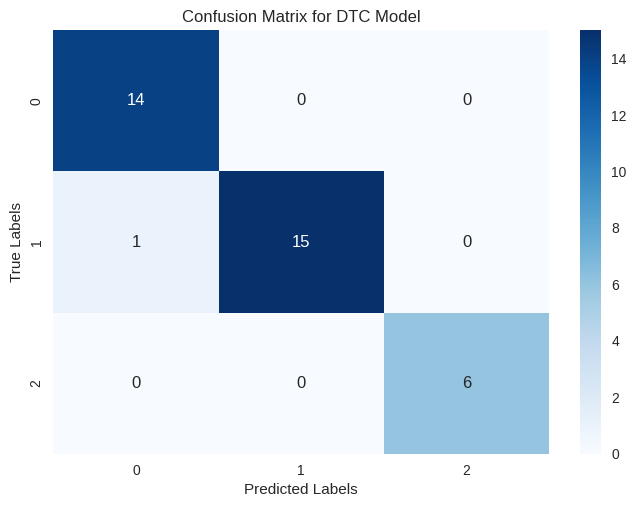

In [ ]:
# Print confusion matrix using a heatmap

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for DTC Model')
plt.show()

In [ ]:
# Print classification report

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



## Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2?
1. In this case, is maximizing precision or recall more important? Why?


<font color='Green'><b>
1. The training and validation accuracies were much lower with the SVC model compared to the DecisionTreeClassifier (DTC). The SVC accuracies were about 0.70 and 0.66 respectively for the training and validation datasets, while the DTC accuracies were about 0.97 and 0.89 respectively. This shows that the DTC model fits the data in the training set and predicts the data in the test set much more accurately.
2. Two reasons why the support vector machines model did not work as well as the tree-based model could be feature scaling and hyperparameter tuning. First of all, SVCs require all the features to vary on a similar scale; however, the wine dataset shows different scales depending on the feature and the data was not preprocessed to account for this. Decision trees are invariant to scaling and do not require preprocessing, so this reason would explain why SVC did not work as well as DTC in this situation. Second of all, SVMs usually require a careful tuning of parameters; however, the SVC model created above was not instantiated with any tuned hyperparameters such as C or gamma. On the other hand, the DTC model created above adjusts the hyperparameter max_depth to reduce its overfitting, so this could have also contributed to the results.
3. Based on the confusion matrix for the DTC, only one sample in the test dataset was incorrectly classified, since the predicted label of class 0 did not match the true label of class 1.
4. In this case, I believe that maximizing precision would be considered more important because it involves minimizing false positives as opposed to false negatives. Misclassifying a wine, especially a bad wine as premium (false positive), could damage a company's reputation and cause them to lose consumer trust, depicting the value of high precision. On the other hand, recall would want to be maximized if there was a huge cost of failing to identify a specific class of wine like premium for example (false negative), even if it means some lower-quality wines slip through. Overall, while both precision and recall are important, I believe that maximizing precision is particularly critical in the wine industry to maintain a brand's reputation and ensure customer satisfaction.
</b></font>

## Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

<font color='Green'><b>DESCRIBE YOUR PROCESS HERE</b></font>

> I referenced a few sources to come up with my code including the link provided to be able to download the wine dataset, as well as notes given in labs 1, 2, 3, and 4 to be able to import the appropriate libraries and use the DecisionTreeClassifier and SVC functions (variants of their similar regressor functions). I also made sure to properly read the instructions given to create the models and calculate the accuracies. I was able to reference the confusion matrix code from lab 2, but I had to reference sci-kit documentation for the classification report (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html). I also referenced my previous assignment.

> I completed the steps in the order provided because I believed it made the most sense.

> I did not use generative AI for this section.

> One challenge I faced was initially trying to understand how to create the confusion matrix and classification report; however, I was able to figure it out using the resources explained above. Overall, referencing the documentation and lab notes helped me be successful.

# **Part 3: Observations/Interpretation (3 marks)**

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.

<font color='Green'><b>
A huge observation that I noticed in Part 1 was the large presence of overfitting in tree-based models. All 3 models, including the Decision Tree, Random Forest and Gradient Boosting Machines regression models, depicted desirable training accuracies with non-desirable validation accuracies that were much worse, implying overfitting. Specifically, all 3 training R2 scores ranged from 0.82 to 0.99, while the validation R2 scores ranged from 0.17 to 0.47 which shows a dramatic difference. This pattern emphasizes the importance of parameter tuning to reduce overfitting in tree-based models as discussed in lectures.<br> <br>

The main observation that I had from Part 2 would be the importance of feature scaling to SVM models as opposed to Decision Tree models. It is clear that a huge reason why the support vector machines model did not work as well as the tree-based model was because of feature scaling, as it was discussed as a weakness of SVM models without preprocessing. This was evident in the results as the SVC accuracies were about 0.70 and 0.66 respectively for the training and validation datasets, while the DTC accuracies were about 0.97 and 0.89 respectively.
</b></font>

## **Part 4:** Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.

<font color='Green'><b>
I really liked being able to calculate and compare different regression and classification metrics for real-life datasets in order to better understand the strengths and weaknesses of each when trying to create a model that is best suited for a specific dataset. I found it interesting that the tree-based models overfit the data so drastically, but it was challenging at times to understand how the hyperparameters could be tuned to improve the results.
</b></font>

## **Part 5:** Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [ ]:
from sklearn.svm import LinearSVC
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# Instantiate the models
linearSVC_model = LinearSVC(max_iter = 5000, random_state = 0)

# Initialize results DataFrame
results = pd.DataFrame(columns=['Training Accuracy', 'Validation Accuracy'])

# Calculate accuracies with cross-validation
cv_results = cross_validate(linearSVC_model, X, y, scoring = 'accuracy', return_train_score = True)
training_accuracy = cv_results['train_score'].mean()
validation_accuracy = cv_results['test_score'].mean()

# Add accuracy results to DataFrame
results.loc['LinearSVC', 'Training Accuracy'] = training_accuracy
results.loc['LinearSVC', 'Validation Accuracy'] = validation_accuracy

# Print results
print(results)

# Reset warnings to default
warnings.simplefilter('default', ConvergenceWarning)

          Training Accuracy Validation Accuracy
LinearSVC          0.880725            0.921746


> Using LinearSVC clearly improved the accuracy scores of the dataset in Part 2 compared to the SVC model (0.70 and 0.66 respectively for the training and validation sets). This could imply that the data was more linearly separable than complex because LinearSVC specifically looks for a linear decision boundary, while the SVC model used the default RBF kernel which is more suited to look for complexities.

> On the other hand, the LinearSVC model gave a lower training accuracy than the Decision Tree Classifier model (0.88 < 0.97), but a higher validation accuracy (0.92 > 0.89), which insinuates that DTC was able to fit the training data better, but LinearSVC predicted unseen values more accurately. DTC models are more flexible in capturing relationships between features, which would explain the higher training accuracy scores; however, decision trees are also prone to overfitting which supports the DTC model's lower validation accuracy.

> Overall, LinearSVC is a good fit for this dataset because it allows for high accuracy scores, especially a high validation accuracy which is the most important for predicting future values.